# <center>Projet<br /> Algorithmique avancé</center>

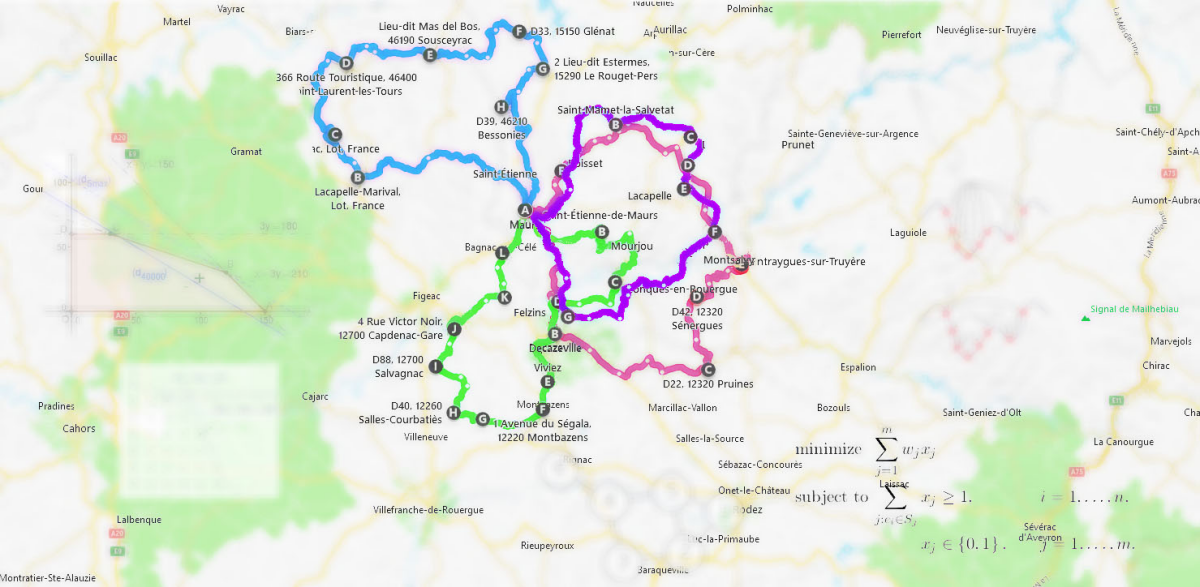

# Introduction
Depuis les années 90, il y a eu une véritable prise de conscience mondiale de la nécessité de réduire la consommation d'énergie et des émissions de gaz à effet de serre.
De nombreux moyens ont été mis en œuvre mais ils s'avèrent insuffisants pour ralentir le réchauffement climatique.
Notre structure CesiCDP est déjà bien implantée dans le domaine. De nombreuses études ont au préalable été réalisées dans en ce qui concerne la mobilité multimodale intelligente. 
Malgré les problèmes d'optimisation de la gestion des ressources qui se posent, l'impact sur l'environnent est significatif, ce qui fait de notre étude une priorité.
CesiCDP a décidé d’orienter son étude sur la gestion de tournées de livraison, plus précisément dans l'optimisation de celles-ci dans le but de minimiser la durée totale de la tournée tout en prenant en compte le trafic.
Nous allons donc mettre en place un algorithme grâce à la recherche Opérationnelle en s'aidant du problème de tournée de véhicules (<b>VRP</b>) qui reprend le thème de notre étude.
L'objectif de l'étude qui suit est de déterminer et démontrer la classe de notre problème afin d'élucider la complexité de notre problème.
Nous avons décidé de mettre en place une contrainte qui consiste à définir pour chaque objet un intervalle de temps dans laquelle les livraisons doivent être effectuées, sinon dans le cas contraire le livreur devra attendre.

# 1. Problème détaillé
**Paramètres**
- un graphe complet G = (V,A,ω) non-orienté avec V un ensemble de sommets, A un ensemble d'arcs et $ω:{A \to {\mathbb{N}}} $ une fonction de coût sur les arcs;
- un entier $C \in {\mathbb{N}}$;
- $c_{i,j}$ : le coût pour aller du sommet i au sommet j, pour tout $(i,j) \in V$  
<!-- - $t_{i,j}$ : le temps de trajet entre les sommets i et j, pour tout $(i,j) \in A$ -->
- $[a_i,b_i]$ : fenêtre de temps pour le sommet $i \in V$.
- $U$ : Le nombre total de véhicules
- $Q$ : La capacité d'un véhicule
- $K$ : l'ensemble des véhicles
- $d_{i}$ : la demande d'un client $i$ ($d_i=V-depot$)

**Question :**
Existe-t-il un cycle passant une et une seule fois par chaque sommet tel que la somme des coûts des arcs utilisés soit inférieure à C ?

**Variables de décision**  
- $x_{i,j,k}=\left\{ 
  \begin{array}{ c l }
    1 & \quad \textrm{si le véhicule k va du sommet i au sommet j} \\
    0                 & \quad \textrm{sinon}
  \end{array}
\right. \quad \forall {i,j \in V} et {k \in K}$  
</br></br>
- $s_{i,k} \in R_{+}$ : le temps au moment où le véhicule k comme à servir le sommet $i \in V$.
- $depot$ : le point de départ du cycle

**Modélisation**  
- Fonction objectif  
$\hspace{3cm}$
$$\min \sum_{i \in V}\sum_{j \in V}\sum_{k \in K}\,c_{ij} x_{ijk}$$ 
$\hspace{3cm}$
- Contrainte de flux : exactement un véhicule entrant dans la ville  
$\hspace{3cm}$
$$\sum_{j \in V}\sum_{k \in K}\,x_{ijk} = 1 \quad \forall i \in V$$
$\hspace{3cm}$
- Contrainte de flux : exactement un véhicule sortant de la ville  
$\hspace{3cm}$
$$\sum_{i \in V}\sum_{k \in K}\,x_{ijk} = 1 \quad \forall j \in V$$
$\hspace{3cm}$
- Contrainte de flux : le véhicule qui entre dans une ville est le même qui en ressort  
$\hspace{3cm}$
$$\sum_{i \in V, h \ne depot}\, x_{ihk} - \sum_{j \in V }\, x_{hjk} = 0 \quad \forall h \in V, \forall k \in K$$
$\hspace{3cm}$
- Contrainte de capacité : la demande (encombrement d'un objet demandé par le client) totale satisfaite par un véhicule sur un cycle est inférieure ou égale à la capacité totale du véhicule  
$\hspace{3cm}$
$$\sum_{i \in V-depot}\,d_{i}\sum_{j \in V}\,x_{ijk} \le Q \quad \forall k \in K$$
$\hspace{3cm}$
- Contrainte : Tous les véhicules doivent quitter le point de dépot  
$\hspace{3cm}$
$$\sum_{j \in V}\,x_{depotjk} = 1 \quad \forall j \in V$$
$\hspace{3cm}$
- Contrainte de temps : relation entre le temps de départ depuis un client et celui depuis son successeur imédiat  
$\hspace{3cm}$
$$x_{ijk}(s_{ik}+t_{ij}-s_{jk}) \le 0 \quad \forall i,j \in V, \forall k \in K$$  
$\hspace{3cm}$
- Contrainte de temps : la fenêtre de temps est respectée  
$\hspace{3cm}$
$$a_i \le s_{ik} \le b_i \quad \forall i \in V, \forall k \in K$$
$\hspace{3cm}$
- Contrainte :  
$\hspace{3cm}$
$$x_{ijk} \in \{0,1\} \quad \forall i, j \in V, \; \forall k \in K$$
$\hspace{3cm}$
- Contrainte des sous tours : élimination des sous tours  
$\hspace{3cm}$
$$\sum_{i,j \in S, i \ne j}\, x_{ij} \le |S| - 1 \quad \forall S \varsubsetneq V, \; |S| \geq 2$$


# 2. Etude de la complexité du problème
**Classe du problème**  
Le problème traité dans cette étude est de la classe NP-Complet

**Démonstration de la classe du problème**
<ul>
    <li>Etape 1 : Montrons que le problème est dans NP  
    La donnée des sommets successifs dans le circuit est un certificat car on peut vérifier en temps polynomial qu'il ne passe pas deux fois par le même sommet et qu'il est bien de coût total inférieur à C. Ainsi, le problème est de classe NP.
    </li>
    <br>
    <li>
Etape 2 : Montrons que le problème TSP est NP-difficile. En montrant que le TSP est au moins aussi difficile que le cycle Hamiltonien, on montre du même coup que le TSP est NP-difficile car le cycle Hamiltonien est connu pour être NP-difficile. Réduisons donc polynomialement en premier lieu le cycle hamiltonien au TSP. Pour cela, posons : $I_{H}=(V,E)$, une instance du cycle Hamiltonien. Construisons ensuite une instance $I_{T}=(V,E')$ du TSP avec :  
$$E'= {(i,j):i,j \in V \,et\, i \ne j}$$  
La fonction de coût donne alors:  
        <br>
$$ω(i,j)=\left\{ 
  \begin{array}{ c l }
    0 & \quad \textrm{si } (i,j) \in E \\
    1                 & \quad \textrm{sinon}
  \end{array}
\right.$$<br>
        Montrons que $I_{H}$ possède un cycle Hamiltonien <b>si et seulement si</b> $I_{T}$ possède un cycle avec un coût de plus <b>0</b>.  
        <ul>
            <li>
                Montrons donc premièrement que si $I_{H}$ possède un cycle Hamiltonien, alors $I_{T}$ possède un cycle de coût $0$.<br>  
                Supposons qu'il existe un cycle Hamiltonien $h$ dans $I_{H}$. <b>Il est clair que</b> le coût de chaque arête dans $h$ est $0$ dans $I_{T}$ par construction. Alors, $h$ possède un coût de $0$ dans $I_{T}$. Ainsi, si le graphe $I_{H}$ possède un cycle Hamiltonien, alors $I_{T}$ possède un cycle de coût $0$.
            </li><br>
            <li>
                Montrons que la réciproque est aussi vraie (si $I_{T}$ possède un cycle de coût $0$, alors $I_{H}$ possède un cycle Hamiltonien).<br> 
                Supposons cette fois, que $I_{T}$ possède un cycle $t$ avec un coût total <b>de $0$ au plus</b>. Le coût des arêtes dans $I_{T}$ sont 0 et 1 par définition. Par conséquent, chaque arête de $t$ possède obligatoirement un coût de $0$. On conclut ainsi que $t$ contient exclusivement des arêtes de $E$ et que t est un cycle Hamiltonien. Ainsi, si $I_{T}$ possède un cycle de coût $0$, alors $I_{H}$ possède un cycle Hamiltonien.
            </li>
        </ul>  
        Nous avons ainsi prouvé que $I_{H}$ admet un cycle hamiltonien, si et seulement si $I_{T}$ admet un cycle de coût au plus égal à $0$. TSP est NP-complet.
    </li>
</ul>

# 4. Solution au problème


Le code ci-dessous reprend le problème détaillé avec seulement la version de base sans contraintes.
Il utilise la technique de la recherche tabou multi start.

Dans l'optique de résoudre le problème des tournées de véhicule (VRP), l'utilisation de métaheuristiques devient intéressant. 
C'est dans ce contexte que la recherche tabou à été implémenté pour résoudre le problème.

La recherche tabou pour ce problème fonctionne de la manière suivante :

Étape 1 : On initialise le nombre d'itérations, la taille de la liste tabou et le move operator

Étape 2 : On génère une solution initiale

Étape 3 : On crée un voisinage avec le move opérateur swap

Étape 4 : On évalue tout le voisinage et on trie de la meilleure à la pire valeur objective

Étape 5 : On récupère la meilleure solution

Étape 6 : On vérifie si la solution est tabou

si non on ajoute cette solution à la liste tabou, si celle-ci est pleine on retire la plus vieille solution.
Si oui on passe à la prochaine solution. et on revérifie si elle est tabou
Étape 7 : La solution ajoutée à la liste tabou devient la solution courante

Étape 8 : on répète l'étape 5 à 7 par le nombre d'itération initialisé au début.

**Génération des données**  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.spatial.distance as ssd
import random as rd
import itertools as itr

nbVilles = 20

X_Coordinations = np.random.randint(100, size=(nbVilles))
print("Coordonnées X des villes \n", X_Coordinations)

Y_Coordinations = np.random.randint(100, size=(nbVilles))
print("Coordonnées Y des villes \n", Y_Coordinations)

X_Y_Coordinations = np.column_stack((X_Coordinations,Y_Coordinations))
print("Coordonnées des villes \n", X_Y_Coordinations)

Distance_Matrix = ssd.cdist(X_Y_Coordinations,X_Y_Coordinations,'euclidean')
an = np.arange(1,len(X_Coordinations)+1)
Dist_Dataframe = pd.DataFrame(Distance_Matrix,columns = an, index = an)
print("Distance entre chaque villes \n", Dist_Dataframe)


Coordonnées X des villes 
 [79 91 40 46 15 57 58 34 14 48 24 29 41 79 59 77 25 62 12 60]
Coordonnées Y des villes 
 [77 55 18  8 80 29 55 50 25 24 18 14 88 33  7 77 78 31 74 18]
Coordonnées des villes 
 [[79 77]
 [91 55]
 [40 18]
 [46  8]
 [15 80]
 [57 29]
 [58 55]
 [34 50]
 [14 25]
 [48 24]
 [24 18]
 [29 14]
 [41 88]
 [79 33]
 [59  7]
 [77 77]
 [25 78]
 [62 31]
 [12 74]
 [60 18]]
Distance entre chaque villes 
            1          2          3          4          5          6   \
1    0.000000  25.059928  70.724819  76.485293  64.070274  52.801515   
2   25.059928   0.000000  63.007936  65.069194  80.006250  42.801869   
3   70.724819  63.007936   0.000000  11.661904  66.850580  20.248457   
4   76.485293  65.069194  11.661904   0.000000  78.390050  23.706539   
5   64.070274  80.006250  66.850580  78.390050   0.000000  66.068147   
6   52.801515  42.801869  20.248457  23.706539  66.068147   0.000000   
7   30.413813  33.000000  41.146081  48.507731  49.739320  26.019224   
8   52.47

**Solution initiale**

In [2]:
# Initial solution to start with
initial_solution = np.arange(1,nbVilles +1)
rd.shuffle(initial_solution)
index = np.argwhere(initial_solution==1)
initial_solution = np.delete(initial_solution, index)
initial_solution = np.insert(np.append(initial_solution, [1]), 0, 1)
print(initial_solution)

[ 1  7 17 19  3 16 12 13 10  5  9  8 11 15 18 20  4  6  2 14  1]


**Cout d'une solution**

In [3]:
def Complete_Distance(sol):
    t = 0
    r = 1
    Every_Dist = []
    for i in sol:
        if r < len(sol):
            Dist = Dist_Dataframe.loc[sol[t],sol[r]]
            Every_Dist = np.append(Every_Dist,Dist)
            t = t+1
            r = r+1
    return int(sum(Every_Dist))

In [4]:
print("Le coût du circuit est :", Complete_Distance(initial_solution))

Le coût du circuit est : 847


**voisinage**

Calcul des solutions voisines d'une solution en particulier.


In [5]:
from functools import lru_cache

def voisinage(solution):

    solution_without_wh = solution[1:len(solution)-1]
    
    List_of_N = list(itr.combinations(solution_without_wh, 2)) # Get all the combinations of every two to swap
    Counter_for_N = 0
    t = 0
    r = 1
    
    Store_all_Combinations = np.empty((0,len(solution_without_wh))) # To store all possible combinations

    for i in List_of_N: # For i in every combination of 2
        X_Swap = []
        A_Counter = List_of_N[Counter_for_N] # Each element in the combination of 2
        A_1 = A_Counter[0] # First element of the combination
        A_2 = A_Counter[1] # Second element of the combination
        
        # Making a new list of the new set of solutions
        u= 0
        for j in solution_without_wh:
            if solution_without_wh[u] == A_1: 
                X_Swap = np.append(X_Swap,A_2) # Swap with second element
            elif solution_without_wh[u] == A_2:
                X_Swap = np.append(X_Swap,A_1)
            else:
                X_Swap = np.append(X_Swap,solution_without_wh[u]) # If not first or second, put the element as is
            
            X_Swap = X_Swap[np.newaxis] 
    
            u = u+1
        
        
        Store_all_Combinations = np.vstack((Store_all_Combinations,X_Swap)) # Stack all the solutions, all possible combinations
        
        Counter_for_N = Counter_for_N+1
    return(Store_all_Combinations)


In [6]:
for voisin in voisinage(initial_solution):
    print(np.concatenate([[1],voisin,[1]]))

[ 1. 17.  7. 19.  3. 16. 12. 13. 10.  5.  9.  8. 11. 15. 18. 20.  4.  6.
  2. 14.  1.]
[ 1. 19. 17.  7.  3. 16. 12. 13. 10.  5.  9.  8. 11. 15. 18. 20.  4.  6.
  2. 14.  1.]
[ 1.  3. 17. 19.  7. 16. 12. 13. 10.  5.  9.  8. 11. 15. 18. 20.  4.  6.
  2. 14.  1.]
[ 1. 16. 17. 19.  3.  7. 12. 13. 10.  5.  9.  8. 11. 15. 18. 20.  4.  6.
  2. 14.  1.]
[ 1. 12. 17. 19.  3. 16.  7. 13. 10.  5.  9.  8. 11. 15. 18. 20.  4.  6.
  2. 14.  1.]
[ 1. 13. 17. 19.  3. 16. 12.  7. 10.  5.  9.  8. 11. 15. 18. 20.  4.  6.
  2. 14.  1.]
[ 1. 10. 17. 19.  3. 16. 12. 13.  7.  5.  9.  8. 11. 15. 18. 20.  4.  6.
  2. 14.  1.]
[ 1.  5. 17. 19.  3. 16. 12. 13. 10.  7.  9.  8. 11. 15. 18. 20.  4.  6.
  2. 14.  1.]
[ 1.  9. 17. 19.  3. 16. 12. 13. 10.  5.  7.  8. 11. 15. 18. 20.  4.  6.
  2. 14.  1.]
[ 1.  8. 17. 19.  3. 16. 12. 13. 10.  5.  9.  7. 11. 15. 18. 20.  4.  6.
  2. 14.  1.]
[ 1. 11. 17. 19.  3. 16. 12. 13. 10.  5.  9.  8.  7. 15. 18. 20.  4.  6.
  2. 14.  1.]
[ 1. 15. 17. 19.  3. 16. 12. 13. 10.  5.  9

**Recheche tabou**

In [7]:
from collections import deque

def recherche_tabou(solution_initiale, taille_tabou, iter_max):
    
    nb_iter = 0                                                                
    liste_tabou = deque((), maxlen = taille_tabou)# +1 to keep track of the fitness value
                                                                           
    # solution variables for the search of the non-taboo optimal neighbor     
    solution_courante = solution_initiale                                     
    meilleure = solution_initiale                                              
    meilleure_globale = solution_initiale                                     
                                                                               
    # value variables for the search of the non-taboo optimal neighbor        
    valeur_meilleure = Complete_Distance(solution_initiale)                      
    valeur_meilleure_globale = valeur_meilleure   
    
    # list of current and best solutions found, to display the trajectory
    # the element at the ith position corresponds to iteration i
    courantes =\
        deque(()) 
    meilleures_courantes =\
        deque(()) 
                                                                               
    while (nb_iter < iter_max):      
        nb_iter += 1
        valeur_meilleure = 0                                                 
                                                                               
        # we go through all the neighbors of the current solution                 
        for voisin in voisinage(solution_courante):                            
            valeur_voisin=Complete_Distance(np.concatenate([[1],voisin,[1]]))                               
            # update best non-taboo solution found                       
            if valeur_voisin > valeur_meilleure and voisin not in liste_tabou: 
                valeur_meilleure = valeur_voisin                               
                meilleure = np.concatenate([[1],voisin,[1]])                                             
                                                                               
        # update the best solution found since the beginning       
        if valeur_meilleure > valeur_meilleure_globale:                        
            meilleure_globale = meilleure                                      
            valeur_meilleure_globale = valeur_meilleure                        
                                                        
        meilleures_courantes.append(
            valeur_meilleure_globale) 
        courantes.append(
                valeur_meilleure)      
        
        # we go to the best non-taboo neighbor found                        
        solution_courante = meilleure                                          
                                                                               
        # we update the taboo list                                         
        liste_tabou.append(solution_courante)  
        while len(liste_tabou) > taille_tabou:
            liste_tabou = liste_tabou[:-1];
            
    return meilleure_globale, courantes, meilleures_courantes                                                   

**Solution finale**

In [8]:
meilleure_sol = 0
meilleure_valeur = 100000
nb_tests = 5
iter_max = 20
taille_tabou = 20

for x in range(0,nb_tests):
    # Initial solution to start with
    solution = np.arange(1,nbVilles +1)
    rd.shuffle(solution)
    index = np.argwhere(solution==1)
    solution = np.delete(solution, index)
    solution = np.insert(np.append(solution, [1]), 0, 1)
    # tabu search 
    sol, courants, meilleurs_courants = recherche_tabou(solution, taille_tabou, iter_max)
    print(sol)
    valeur = Complete_Distance(sol)
    print(valeur)
    if valeur < meilleure_valeur:
        meilleure_sol = sol
        meilleure_valeur = valeur
        
print("le meilleur circuit est : ", meilleure_sol)
print("le meilleur coût est : ", meilleure_valeur)

C:\Users\danyk\AppData\Local\Temp\ipykernel_2528\1316041095.py:32: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if valeur_voisin > valeur_meilleure and voisin not in liste_tabou:


[ 1. 10.  5.  6. 19. 18. 12.  7. 15. 17. 20. 13.  3. 16. 11.  2.  9. 14.
  8.  4.  1.]
1290
[ 1.  8. 20.  5.  6.  9.  2. 10. 17. 15. 13.  4.  7.  3. 16. 12. 18. 19.
 14. 11.  1.]
1273
[ 1. 11. 16. 12.  7.  4. 13.  3. 14.  8. 18. 19. 20.  5. 15. 17. 10.  2.
  9.  6.  1.]
1282
[ 1. 12.  2.  8. 15. 13.  4.  7.  9.  6. 17. 10. 16.  3. 18.  5. 20. 19.
 14. 11.  1.]
1277
[ 1. 10.  5.  6. 19. 18.  8. 15.  7. 11. 14.  9.  2. 12. 16.  4. 17. 20.
 13.  3.  1.]
1294
le meilleur circuit est :  [ 1.  8. 20.  5.  6.  9.  2. 10. 17. 15. 13.  4.  7.  3. 16. 12. 18. 19.
 14. 11.  1.]
le meilleur coût est :  1273


**Etude statistique**

Impact de la taille de la liste tabou sur la qualité des solutions

In [10]:
# test parameters
tabou_min = 1
tabou_max = 20
pas = 1

nb_test  = 4
iter_max = 20

# results storage
tabu_min_values = []
tabu_moyennes   = []
tabu_max_values = []

# loop on tabu list
for taille_tabou in range(tabou_min, tabou_max, pas):
    valeurs = deque(())
    for _ in range(nb_test):
        initial_solution = np.arange(1,nbVilles +1)
        rd.shuffle(initial_solution)
        sol, courants, meilleurs_courants = recherche_tabou(initial_solution, taille_tabou, iter_max)
        val = int(Complete_Distance(sol))
        valeurs.append(val)

    # average calculation
    tabu_moyennes.append(np.average(valeurs))
    tabu_min_values.append(np.array(valeurs).min())
    tabu_max_values.append(np.array(valeurs).max())

print(tabu_moyennes)
print(tabu_min_values)
print(tabu_max_values)

C:\Users\danyk\AppData\Local\Temp\ipykernel_2528\1316041095.py:32: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if valeur_voisin > valeur_meilleure and voisin not in liste_tabou:


[1228.25, 1267.75, 1234.75, 1296.0, 1224.0, 1254.75, 1287.25, 1251.25, 1255.5, 1270.25, 1256.0, 1249.5, 1268.0, 1260.5, 1261.25, 1244.0, 1280.75, 1269.75, 1241.75]
[1173, 1254, 1167, 1286, 1159, 1216, 1229, 1219, 1225, 1245, 1237, 1186, 1229, 1184, 1192, 1189, 1217, 1248, 1224]
[1259, 1280, 1282, 1312, 1276, 1293, 1334, 1288, 1291, 1302, 1276, 1295, 1294, 1323, 1326, 1281, 1337, 1287, 1284]


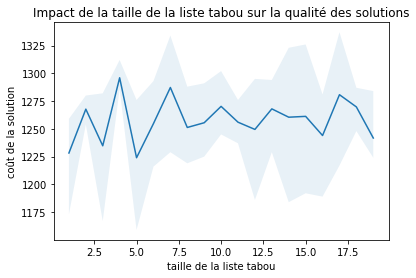

In [11]:
import matplotlib.pyplot as plt

# average curve display
plt.plot(range(tabou_min, tabou_max, pas), tabu_moyennes)

# standard deviation band display
plt.fill_between(range(tabou_min, tabou_max, pas),
                 tabu_max_values,        # borne haute
                 tabu_min_values,        # borne basse
                 alpha=.1)          # transparence
plt.xlabel("taille de la liste tabou")
plt.ylabel("coût de la solution")
plt.title("Impact de la taille de la liste tabou sur la qualité des solutions")
plt.show()

Impact du nombre d'itération sur la qualité des solutions

In [12]:
from ipywidgets import IntProgress
from IPython.display import display
from collections import deque
import numpy as np

rd.seed(a=3)

# paramètres du test
i_min = 1
i_max = 30
pas = 1

nb_test  = 4
taille_tabou = 20

# stockage des résultats
i_min_values = []
i_moyennes   = []
i_max_values = []

# boucle sur la taille de la liste tabou
for nb_iter in range(i_min, i_max, pas):
    valeurs = deque(())
    for _ in range(nb_test):
        initial_solution2 = np.arange(1,nbVilles +1)
        rd.shuffle(initial_solution)
        # génération aléatoire de l'instance et calcul de sa borne supérieure
        sol, courants, meilleurs_courants = recherche_tabou(initial_solution, taille_tabou, nb_iter)
        val = int(Complete_Distance(sol))
        valeurs.append(val)

    # calcul manuel de la moyenne
    i_moyennes.append(np.average(valeurs))
    i_min_values.append(np.array(valeurs).min())
    i_max_values.append(np.array(valeurs).max())

C:\Users\danyk\AppData\Local\Temp\ipykernel_2528\1316041095.py:32: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if valeur_voisin > valeur_meilleure and voisin not in liste_tabou:


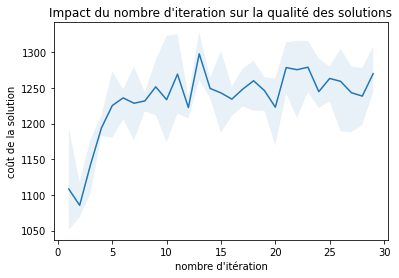

In [13]:
import matplotlib.pyplot as plt

# affichage de la courbe de moyenne
plt.plot(range(i_min, i_max, pas), i_moyennes)

# affichage de la bande d'écart-type
plt.fill_between(range(i_min, i_max, pas),
                 i_max_values,        # borne haute
                 i_min_values,        # borne basse
                 alpha=.1)          # transparence
plt.xlabel("nombre d'itération")
plt.ylabel("coût de la solution")
plt.title("Impact du nombre d'iteration sur la qualité des solutions")
plt.show()

# 5. Documentation de l'étude
- https://www.tutorialspoint.com/design_and_analysis_of_algorithms/design_and_analysis_of_algorithms_np_hard_complete_classes.htm
- https://fr.acervolima.com/preuve-que-le-probleme-du-voyageur-de-commerce-est-np-difficile/